In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [4]:
dataset=pd.read_csv(r"Polynomial-data.csv")
dataset.head(5)

,Level,Salary
0,1,33808
1,2,29015
2,3,35245
3,4,36833
4,5,39254


In [5]:
dataset.corr() # correlation

,Level,Salary
Level,1.000000,0.952442
Salary,0.952442,1.000000


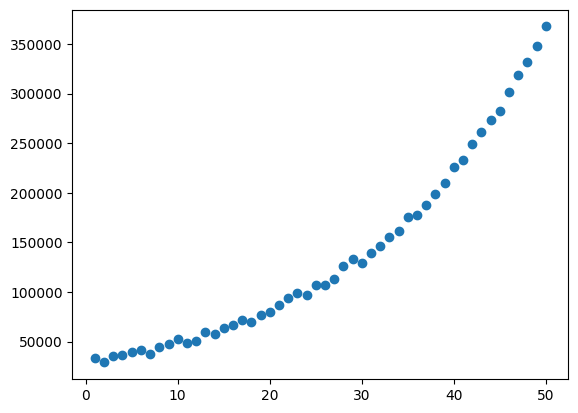

In [7]:
plt.scatter(dataset["Level"],dataset["Salary"])
plt.show()

In [14]:
# convert into polynomial feaures

x=dataset[["Level"]]
y=dataset["Salary"]

In [16]:
# use scikit learn

pf= PolynomialFeatures(degree=2) # upto power - 2
pf.fit(x)
x=pf.transform(x)

In [17]:
# train & test

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [18]:
# Model

lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [49]:
# accuracy

lr.score(x_test,y_test)*100

99.66309042072155

In [50]:
y_prd = lr.predict(x)

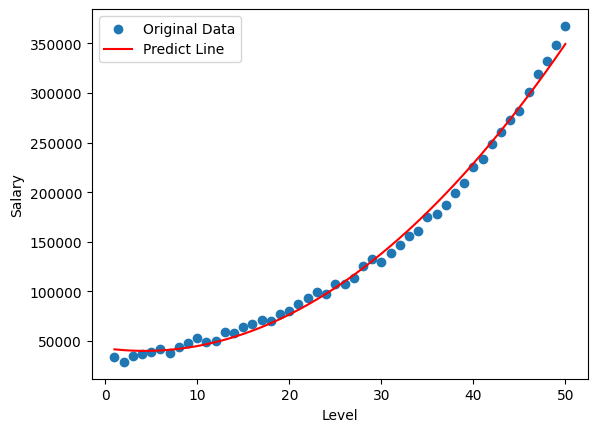

In [55]:
plt.scatter(dataset["Level"],dataset["Salary"])

# Regression line (line fit)
plt.plot(dataset["Level"], y_prd, color='red')

plt.xlabel("Level")
plt.ylabel("Salary")

# Line & dot
plt.legend(["Original Data","Predict Line"])

# Save image
plt.savefig("2. Predict-Plynomial Regression .jpg")

plt.show()

In [20]:
lr.coef_

array([    0.        , -1258.96626077,   147.8062545 ])

In [38]:
c = lr.intercept_

In [45]:
# manual test
# y = m1 * x1 + m2 * x1^2 + ... + c


y = -1258.96626077 * 45 + 147.8062545 * (45)**2 + c
y

np.float64(285465.8833071485)

In [41]:
# predict

predict = pf.transform([[45]])
predict

G:\python\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([[1.000e+00, 4.500e+01, 2.025e+03]])

In [42]:
lr.predict(predict)

array([285465.88329704])